# Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HeartData = pd.read_csv('Heart_Disease_Prediction.csv')
HeartData

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [3]:
HeartData.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [4]:
HeartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
HeartData.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<Figure size 2500x1600 with 0 Axes>

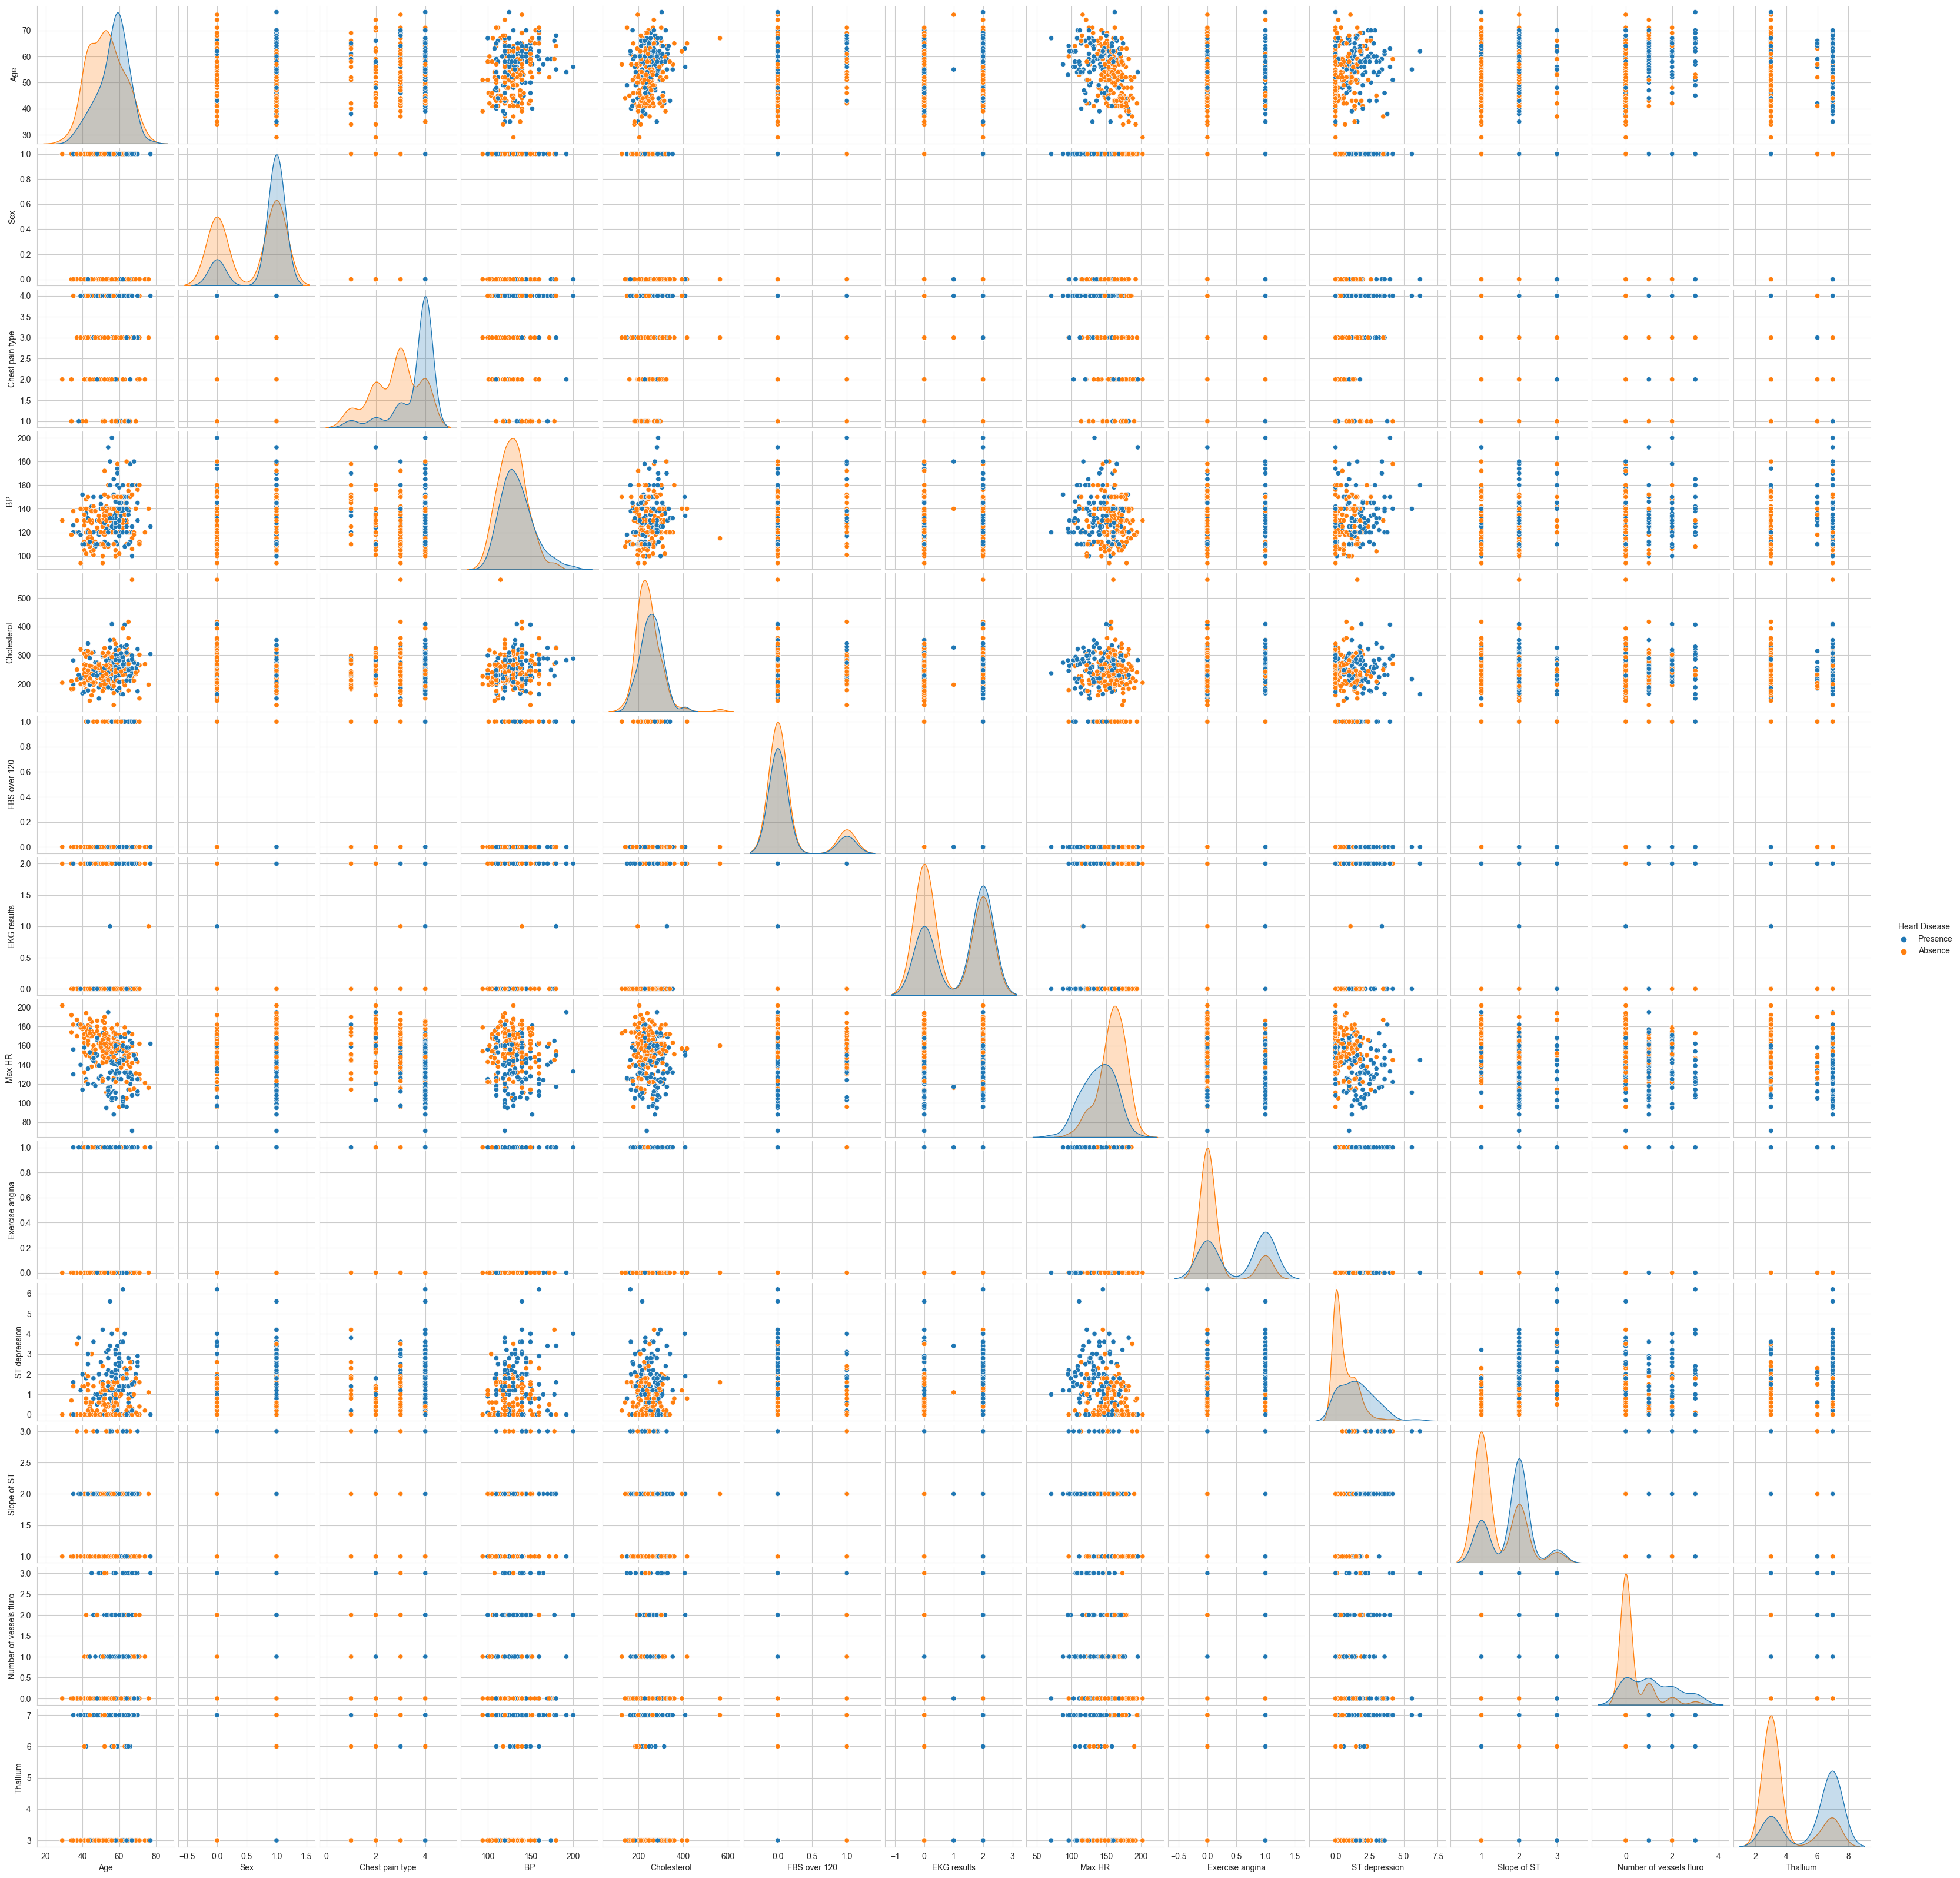

In [6]:
plt.figure(figsize=(25, 16))
sns.pairplot(HeartData, hue='Heart Disease')
plt.show()

In [7]:
HeartData.corr()

C:\Users\Rituraj\AppData\Local\Temp\ipykernel_21712\3162164906.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  HeartData.corr()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


C:\Users\Rituraj\AppData\Local\Temp\ipykernel_21712\3078022533.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HeartData.corr(), annot=True)


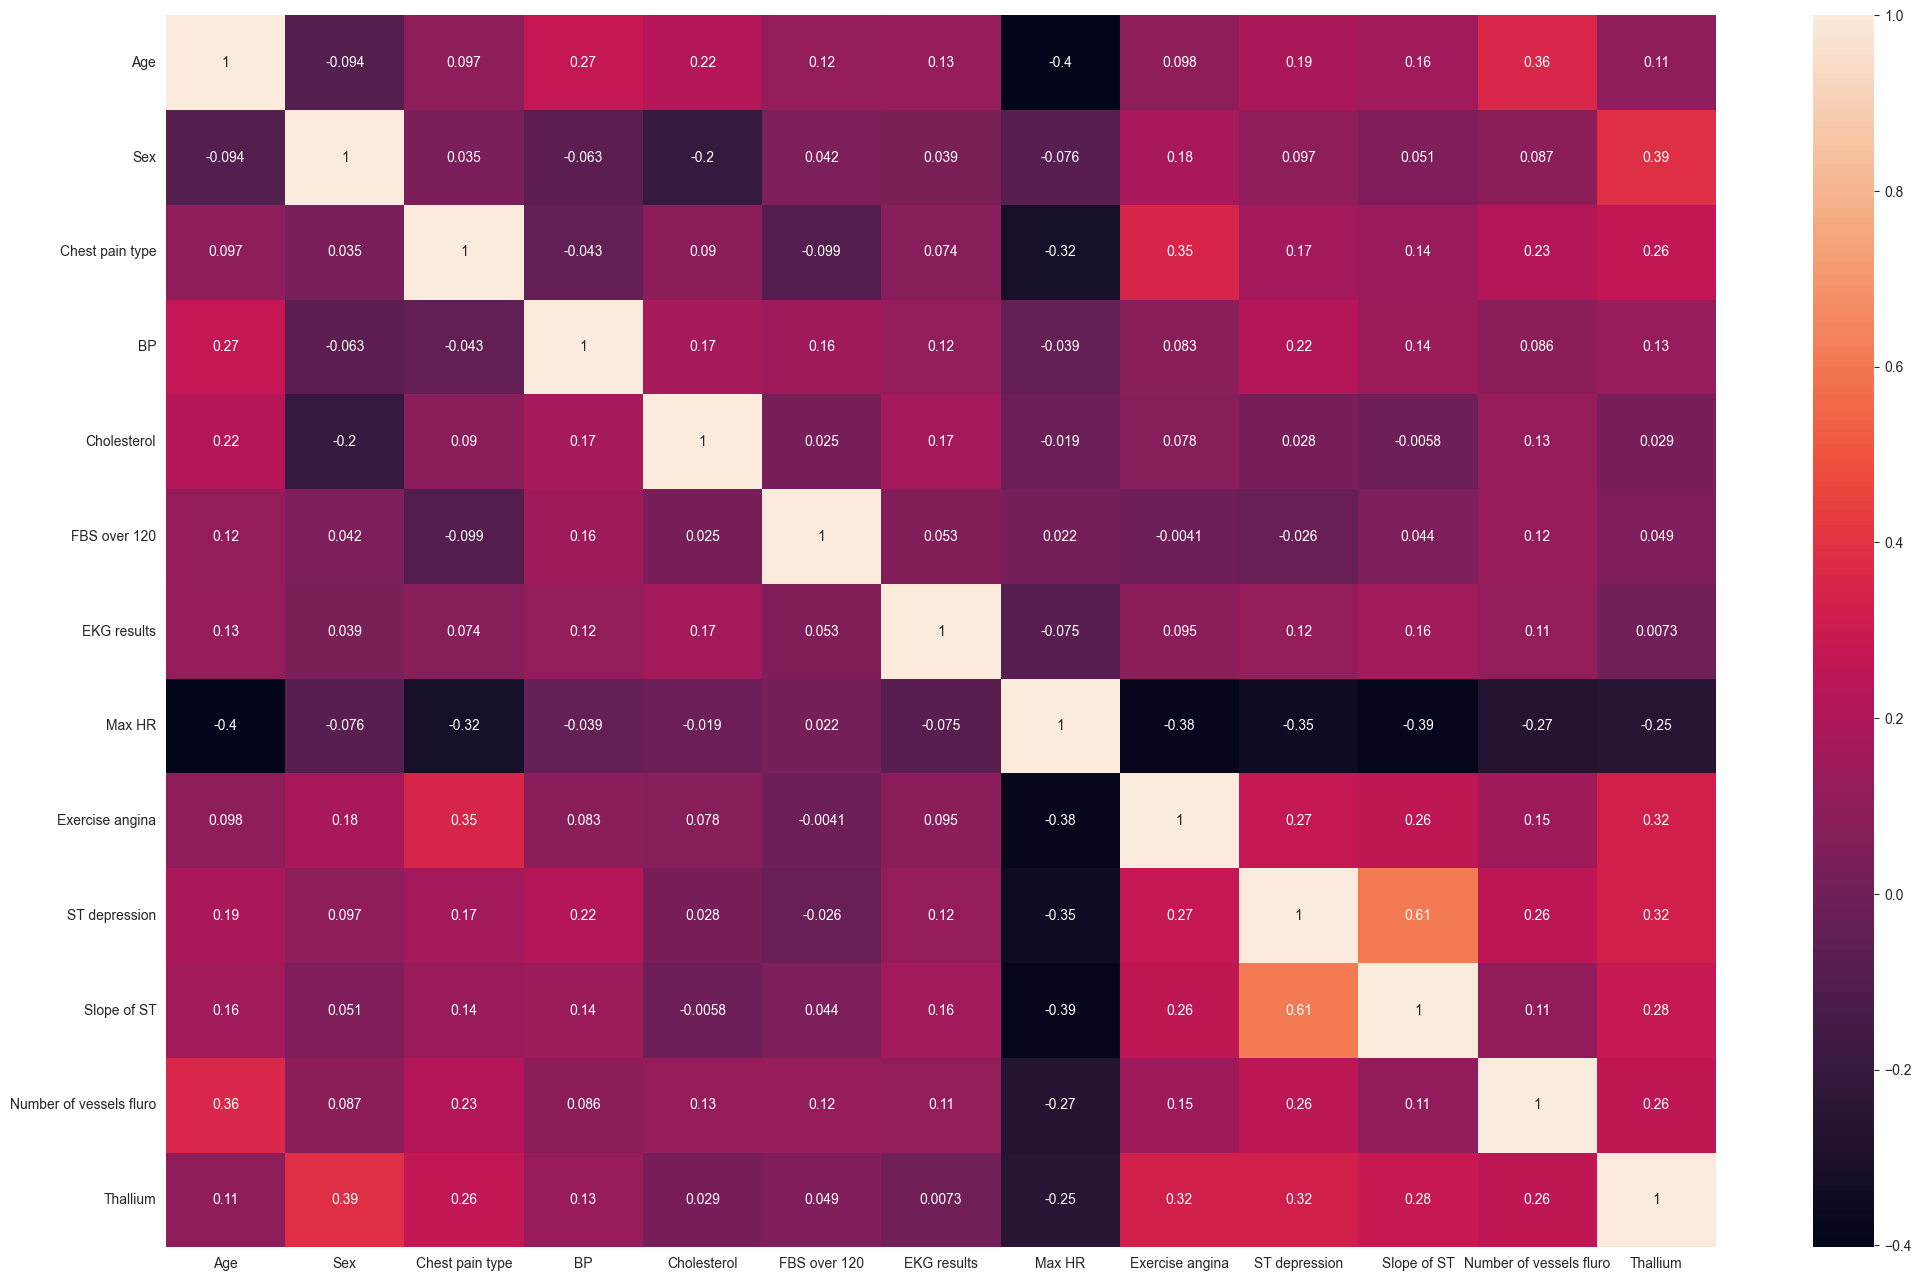

In [8]:
plt.figure(figsize=(25, 16))
sns.heatmap(HeartData.corr(), annot=True)
plt.show()

In [9]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse=False, drop='first')
encodeddataset = onehotencoder.fit_transform(HeartData[['Heart Disease']])
encodeddataset

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [10]:
finalencodeddataset = pd.DataFrame(encodeddataset, columns=['Heart Disease'])
finalencodeddataset

,Heart Disease
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
265,0.0
266,0.0
267,0.0
268,0.0


In [11]:
HeartData.drop(['Heart Disease'], axis=1, inplace=True)

In [12]:
HeartData = pd.concat([HeartData, finalencodeddataset], axis=1)
HeartData

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1.0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0.0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1.0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0.0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0.0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0.0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0.0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0.0


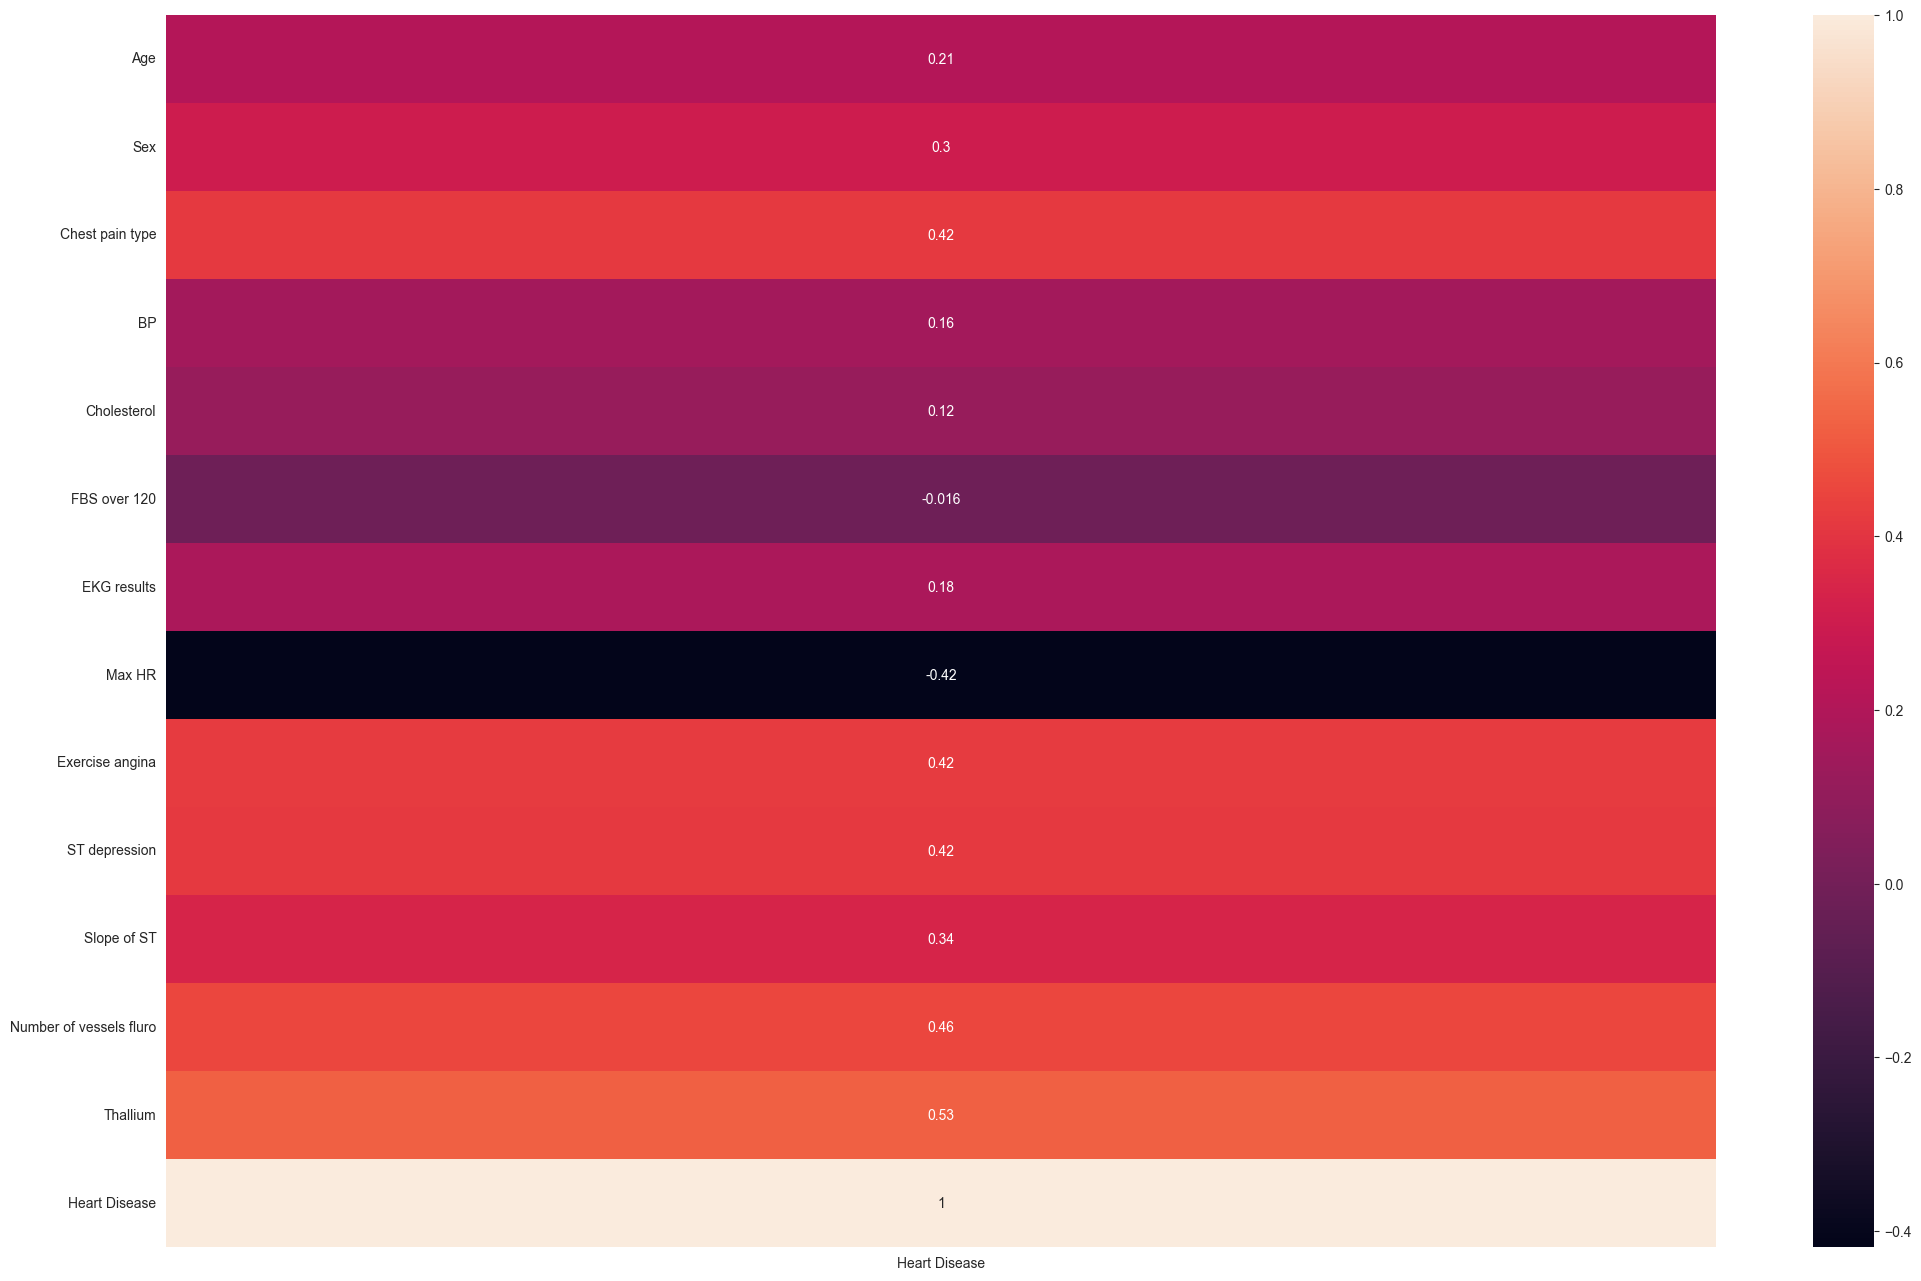

In [13]:
plt.figure(figsize=(25, 16))
sns.heatmap(HeartData.corr()[['Heart Disease']], annot=True)
plt.show()

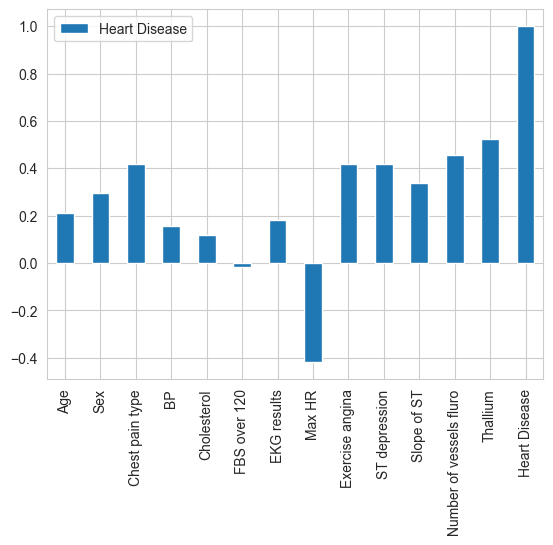

In [14]:
HeartData.corr()[['Heart Disease']].plot(kind='bar')
plt.show()

##### Splitting data into independent and target variable

In [15]:
X = HeartData.drop(['Heart Disease'], axis=1)
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [16]:
Y = HeartData['Heart Disease']
Y

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
265    0.0
266    0.0
267    0.0
268    0.0
269    1.0
Name: Heart Disease, Length: 270, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((216, 13), (54, 13), (216,), (54,))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
from sklearn.metrics import accuracy_score

##### Logistic Regression Classifier

In [20]:
# Without Scaled Data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_LR = logreg.predict(X_test)
accuracy_score(Y_test, Y_pred_LR)

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9074074074074074

In [21]:
# With Scaled Data
from sklearn.linear_model import LogisticRegression
logreg_ = LogisticRegression()
logreg_.fit(X_train, Y_train)
y_pred_LR_ = logreg_.predict(X_test)
accuracy_score(Y_test, y_pred_LR_)

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9074074074074074

##### Support Vector classifier

In [22]:
# Without Scaled Data
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
y_pred_SVM = svc.predict(X_test)
accuracy_score(Y_test, y_pred_SVM)

0.6296296296296297

In [23]:
# With Scaled Data
svc_ = SVC()
svc_.fit(X_train_scaled, Y_train)
y_pred_SVM_ = svc_.predict(X_test_scaled)
accuracy_score(Y_test, y_pred_SVM_)

0.8518518518518519

##### K Nearest Neighbor Classifier

In [24]:
# Without Scaled Data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred_KNN = knn.predict(X_test)
accuracy_score(Y_test, y_pred_KNN)

0.6481481481481481

In [25]:
# With Scaled Data
knn_ = KNeighborsClassifier()
knn_.fit(X_train_scaled, Y_train)
y_pred_KNN_ = knn_.predict(X_test_scaled)
accuracy_score(Y_test, y_pred_KNN_)

0.8333333333333334

##### Decision Tree Classifier

In [26]:
# Without Scaled Data
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred_DTC = dtc.predict(X_test)
accuracy_score(Y_test, y_pred_DTC)

0.7222222222222222

In [27]:
# With Scaled Data
dtc_ = DecisionTreeClassifier()
dtc_.fit(X_train_scaled, Y_train)
y_pred_DTC_ = dtc_.predict(X_test_scaled)
accuracy_score(Y_test, y_pred_DTC_)

0.6666666666666666

##### Random Forest Classifier

In [28]:
# Without Scaled Data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred_RFC = rfc.predict(X_test)
accuracy_score(Y_test, y_pred_RFC)

0.8333333333333334

In [29]:
# With Scaled Data
rfc_ = RandomForestClassifier()
rfc_.fit(X_train_scaled, Y_train)
y_pred_RFC_ = rfc_.predict(X_test_scaled)
accuracy_score(Y_test, y_pred_RFC_)

0.8148148148148148

##### Gaussian Naive Bayes Classifier

In [30]:
# Without Scaled Data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred_GNB = gnb.predict(X_test)
accuracy_score(Y_test, y_pred_GNB)

0.9074074074074074

In [31]:
# With Scaled Data
gnb_ = GaussianNB()
gnb_.fit(X_train_scaled, Y_train)
y_pred_GNB_ = gnb_.predict(X_test_scaled)
accuracy_score(Y_test, y_pred_GNB_)

0.8703703703703703

##### Ada Boost Classifier

In [32]:
# Without Scaled Data
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred_ABC = abc.predict(X_test)
accuracy_score(Y_test, y_pred_ABC)

0.8888888888888888

In [33]:
# With Scaled Data
abc_ = AdaBoostClassifier()
abc_.fit(X_train_scaled, Y_train)
y_pred_ABC_ = abc_.predict(X_test_scaled)
accuracy_score(Y_test, y_pred_ABC_)

0.8333333333333334

##### XG Boost Classifier

In [34]:
# Without Scaled Data
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
y_pred_XGB = xgb.predict(X_test)
accuracy_score(Y_test, y_pred_XGB)

0.8148148148148148

In [35]:
# With Scaled Data
xgb_ = XGBClassifier()
xgb_.fit(X_train_scaled, Y_train)
y_pred_XGB_ = xgb_.predict(X_test_scaled)
accuracy_score(Y_test, y_pred_XGB_)

0.8148148148148148

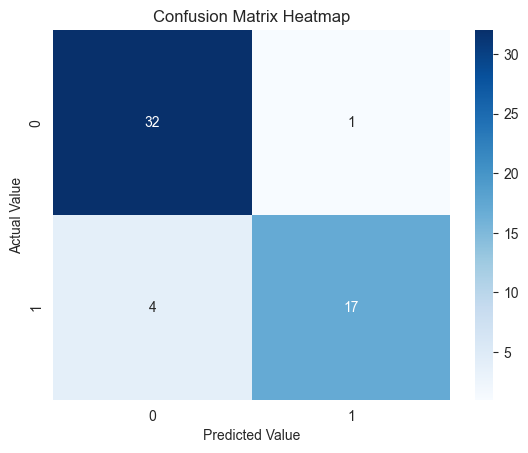

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_LR)
plt.title('Confusion Matrix Heatmap')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_LR))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        33
         1.0       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [38]:
import pickle

In [43]:
pickle.dump(logreg, open('model_pickle.pkl','wb'))

In [40]:
i = pickle.load(open('model_pickle.pkl', 'rb'))

In [41]:
y_pred_ = i.predict(X_test)
accuracy_score(Y_test, y_pred_)

0.9074074074074074